CLASE 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

real = np.array([0,1,0,0,1,1,0,1,0,1])
pred = np.array([0,1,1,0,0,1,0,1,1,1])

DEFINIR FUNCIONES PARA CALCULAR METRICAS

In [9]:
# TP: Positivos reales
def TP(real, pred):
    mult = real * pred
    return np.sum(mult)

# TN: Negativos reales
def TN(real, pred):
    mult = (1 - real) * (1 - pred)
    return np.sum(mult)

# FN: falsos negativos
def FN(real, pred):
    pos = np.sum(real)
    return pos - TP(real, pred)

# FN: falsos positivos
def FP(real, pred):
    neg = np.sum(1 - real)
    return neg - TN(real, pred)

print(f'TP: {TP(real,pred)}')
print(f'TN: {TN(real, pred)}')
print(f'FN: {FN(real,pred)}')
print(f'FP: {FP(real,pred)}')

# tasa de positivos reales
def TPR(real, pred):
    tp = TP(real,pred)
    fn = FN(real,pred)
    return tp / (tp + fn)

print(f'Tasa de positivos reales: {TPR(real, pred)}')

# tasa de falsos positivos
def FPR(real, pred):
    tn = TN(real,pred)
    fp = FP(real,pred)
    return tn / (tn + fp)

print(f'Tasa de falsos positivos: {FPR(real, pred)}')

TP: 4
TN: 3
FN: 1
FP: 2
Tasa de positivos reales: 0.8
Tasa de falsos positivos: 0.6


USANDO SKLEARN

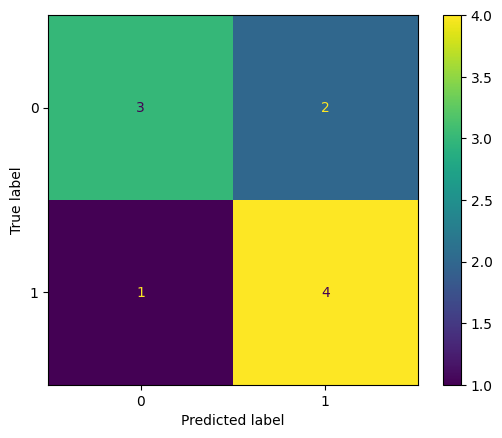

In [3]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(real, pred).ravel()

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(real, pred)

VARIACIÓN DEL UMBRAL

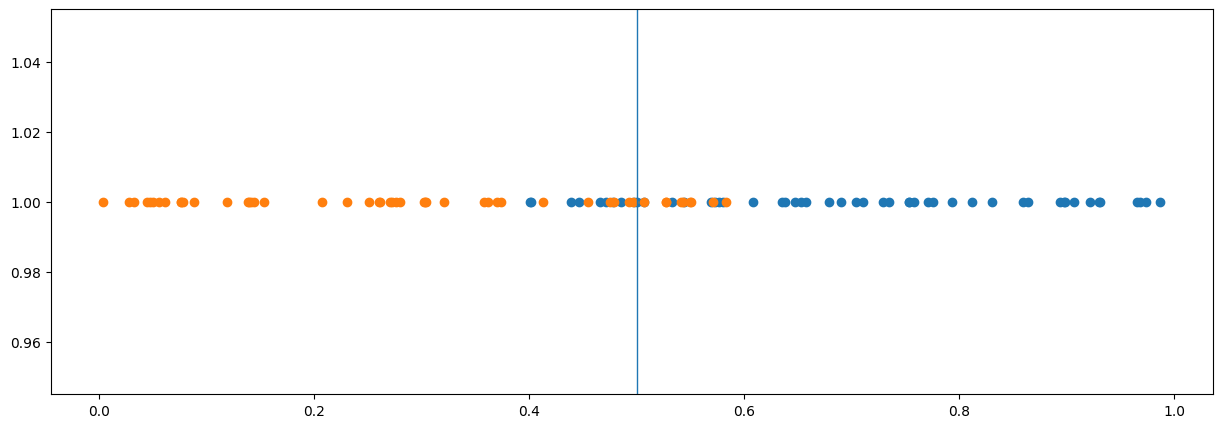

In [4]:
data = pd.read_csv('dataset_covid.csv')
positivo = data['coordenada'][data['covid'] == 1].values
negativo = data['coordenada'][data['covid'] == 0].values

fig,ax = plt.subplots(figsize = (15,5))
plt.scatter(positivo, np.ones(positivo.shape))
plt.scatter(negativo, np.ones(negativo.shape))
plt.axvline(0.5, linewidth = 1, label = 'Umbral x = 0.5')

CURVA ROC Y AUC

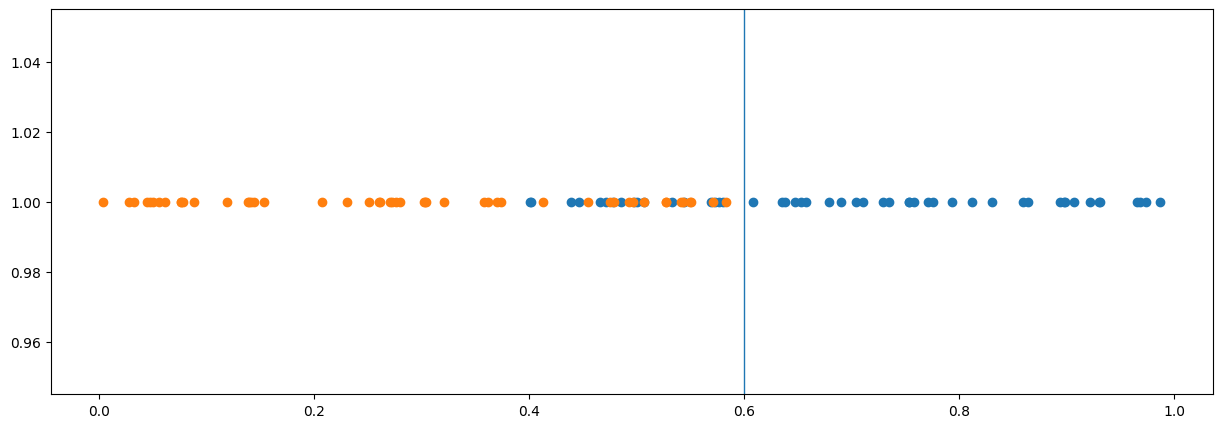

In [8]:
def graficar(data, umbral):
    positivo = data['coordenada'][data['covid'] == 1].values
    negativo = data['coordenada'][data['covid'] == 0].values

    fig,ax = plt.subplots(figsize = (15,5))
    plt.scatter(positivo, np.ones(positivo.shape))
    plt.scatter(negativo, np.ones(negativo.shape))
    plt.axvline(umbral, linewidth = 1, label =f'UMBRAL x = {umbral}')

graficar(data, 0.6)

1.0 

1.0 

1.0 

1.0 

1.0 

1.0 

1.0 

1.0 

0.96 

0.88 

0.78 

0.68 

0.64 

0.52 

0.42 

0.32 

0.26 

0.2 

0.08 

0.0 



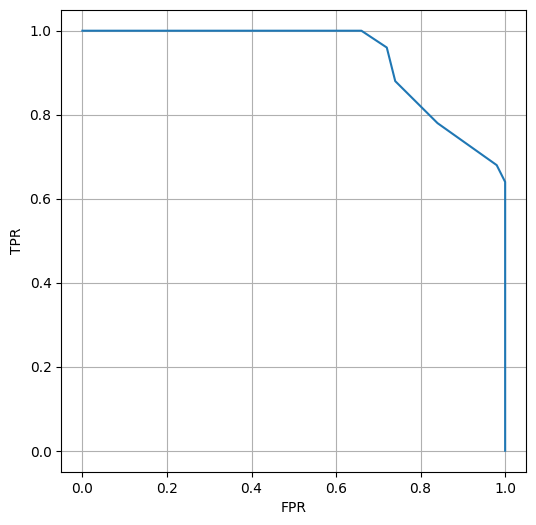

In [13]:
def roc(data,rango):
    umbrales = np.linspace(0,1,rango) #definimos el rango de los umbrales

    #estas son las categorias reales muestreadas
    real = data['covid'].values
    #para cada idx de umbrales voy a calcular la TPR y FPR
    atpr = []
    afpr = []

    for umbral in umbrales:

        #estas son las categorias predichas
        coordenadas = data['coordenada'].values
        pred = np.zeros(real.shape)
        # simulacion de un algoritmo de clasificación
        pred[coordenadas >= umbral] = 1 # si la coord >= umbral asumimos que es rojo

        #calcular las tasas
        tasa_tpr = TPR(real, pred)
        print(tasa_tpr,'\n')
        tasa_fpr = FPR(real, pred)

        atpr.append(tasa_tpr)
        afpr.append(tasa_fpr)

    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(afpr,atpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

    # print("AFPR:", afpr)
    # print("ATPR:", atpr)

    return atpr,afpr

AFPR, ATPR = roc(data, 20)